## Setup
First, we have to import the mario module. Here, we're also adding pylab support in order to plot the results.

In [1]:
import sys
import miopyc
%matplotlib inline
from matplotlib import pyplot as plt

## Define a function for creating a simple plot from a single `MATRIX`.

In [2]:
def standardMatrixPlot(matrix):
    """
    Present an MpfMatrix object as a plot using its own metadata.
    """
    plt.figure()
    column = list(matrix.yvalues.keys())[0]
    plt.plot(matrix.xvalues, matrix.yvalues[column], label=column)
    plt.title(matrix.attrs['TITLE'])
    plt.xlabel(matrix.attrs['XLABEL'])
    plt.ylabel(matrix.attrs['YLABEL'])
    plt.legend(loc='best')

## Reading data from file

When the `MpfFile` constructor is called, the file is read from disk.

## Example 1: `xy` configuration (`SIMLA`)

Note that the matrix object contains the metadata found in the `mpf` file: title, labels, and legends.

In [3]:
mf = miopyc.MpfFile('mpf/ex1/configuration-xy.mpf')
matrix = mf['Load step and time        1     1.00   X   versus   Y']
standardMatrixPlot(matrix)

## Example 2: `z` configuration as function of the `kp` variable (`SIMLA`)

In [4]:
mf = miopyc.MpfFile('mpf/ex2/configuration-z.mpf')
matrix = mf['Load step and time        1     1.00   K   versus   Z-cor']
standardMatrixPlot(matrix)

## Example 3: Envelope results (`RIFLEX`)

This file contains multiple results. It is easy to loop over all matrices and create a plot per matrix. Note that the `mpf` format of `RIFLEX` is slightly different from that of `SIMLA`.

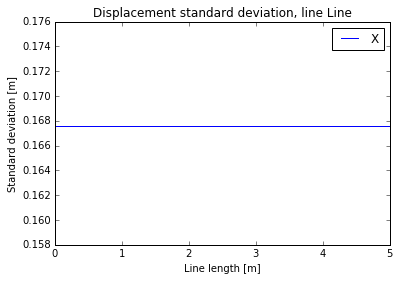

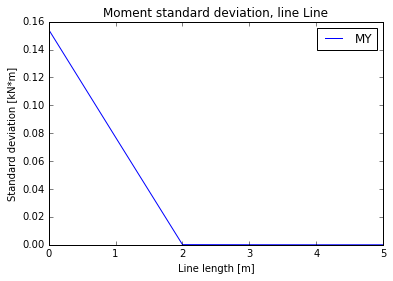

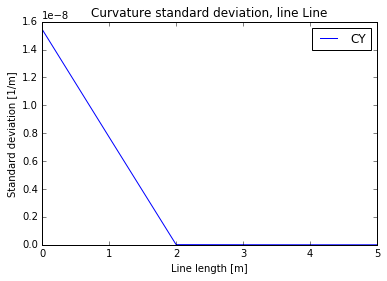

In [5]:
mf = miopyc.MpfFile('mpf/ex3/riflex_dynmod_key_results.mpf')

for matrixname in mf:
    standardMatrixPlot(mf[matrixname])

# Example 4: Duplicated keys

Some MARINTEK programs sometimes emit several plots with the same `MATRIX` name. The module can be configured to report this as an error (default), or to silently ignore duplicates by accepting the last entered matrix. This can be useful if the file you are reading contains duplicates, but you are only interested in results from the last one.

In [6]:
# The default behaviour is to get an exception. Catch it and print the error message on screen.
try:
    mf4 = miopyc.MpfFile('mpf/ex4/riflex_duplicate_key.mpf')
except miopyc.DuplicateKeyError as err:
    sys.stderr.write(str(err) + "\n")
print("Try/except blocks allow the python program to continue after an error occurred.")

Try/except blocks allow the python program to continue after an error occurred.


'Duplicate matrix "Force standard deviation, line Line" in file "mpf/ex4/riflex_duplicate_key.mpf"'


In [7]:
# Configuration can 
mf4 = miopyc.MpfFile('mpf/ex4/riflex_duplicate_key.mpf', ignore_duplicates=True)

for matrixname in mf4:
    standardMatrixPlot(mf4[matrixname])

/home/paul/git/miopyc/miopyc/mpf/mpffile.py:113: UserWarning: Duplicate matrix "Force standard deviation, line Line" in file "mpf/ex4/riflex_duplicate_key.mpf"
  warnings.warn(msg)
